### Question 3: -
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.
Note - Write comments wherever necessary explaining the code written.

Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json

Data Attributes - id: Identification Number - int num: Number of the

● Pokémon in the official Pokédex - int name: Pokémon name -

● string img: URL to an image of this Pokémon - string type:

● Pokémon type -string height: Pokémon height - float

● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or
given

● when transferred - string candy_count: the amount of candies required to evolve
- int

● egg: Number of kilometers to travel to hatch the egg - float spawn_chance:

● Percentage of spawn chance (NEW) - float avg_spawns: Number of this
pokemon on 10.000 spawns (NEW) - int

● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all
time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers:
Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
weakness: Types of

● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of
successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous
evolutions of Pokémon - - list of dict

In [1]:
import requests
import json
import pandas as pd
from pandas import json_normalize
URL = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"


req = requests.get(URL)
text_data= req.text
json_dict= json.loads(text_data)


df = pd.DataFrame.from_dict(json_dict["pokemon"])

In [2]:
df.to_excel("PokemonGO-Pokedex.xlsx") 

In [3]:
df.head(2)


,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    object 
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    object 
 6   weight          151 non-null    object 
 7   candy           151 non-null    object 
 8   candy_count     70 non-null     float64
 9   egg             151 non-null    object 
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    float64
 12  spawn_time      151 non-null    object 
 13  multipliers     70 non-null     object 
 14  weaknesses      151 non-null    object 
 15  next_evolution  70 non-null     object 
 16  prev_evolution  72 non-null     object 
dtypes: float64(3), int64(1), object(13)

In [5]:
df.isnull().sum()

id                 0
num                0
name               0
img                0
type               0
height             0
weight             0
candy              0
candy_count       81
egg                0
spawn_chance       0
avg_spawns         0
spawn_time         0
multipliers       81
weaknesses         0
next_evolution    81
prev_evolution    79
dtype: int64

### changes datatypes:-


num-int,

height-float,

weight--float,

candy-count-int,

egg -float,

avg-spawns-int,

spawn-time-minutes:seconds,

multipliers-list of int,

next_evolution-list of dict,

prev_evolution-list of dict

In [6]:
df['num']=df['num'].astype("int64")

In [7]:
import numpy as np
df['candy_count']=df['candy_count'].fillna(df['candy_count'].mean())

In [8]:
df['candy_count']=df['candy_count'].astype("int64")

In [9]:
df['avg_spawns']=df['avg_spawns'].astype("int64")

In [10]:
df['height']=df['height'].str.replace('m','')


In [11]:
df['weight']=df['weight'].astype(str).str.replace('kg', '')

In [12]:
df['height']=df['height'].astype("float")

In [13]:
df['weight']=df['weight'].astype("float")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    int64  
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    float64
 6   weight          151 non-null    float64
 7   candy           151 non-null    object 
 8   candy_count     151 non-null    int64  
 9   egg             151 non-null    object 
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    int64  
 12  spawn_time      151 non-null    object 
 13  multipliers     70 non-null     object 
 14  weaknesses      151 non-null    object 
 15  next_evolution  70 non-null     object 
 16  prev_evolution  72 non-null     object 
dtypes: float64(3), int64(4), object(10)

In [15]:
 
 df["multipliers"].value_counts()


multipliers
[1.79]          2
[1.4]           2
[1.58]          1
[1.48, 1.5]     1
[2.65]          1
               ..
[1.98]          1
[2.27]          1
[2.17, 2.28]    1
[2.31, 2.36]    1
[2.05]          1
Name: count, Length: 68, dtype: int64

In [16]:
#df['multipliers']=df['multipliers'].fillna(df['multipliers'].mean())

In [17]:
#df["multipliers"] = df["multipliers"].apply(str).astype(int)

In [18]:
df['multipliers'].dtypes

dtype('O')

Question 6 -

Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

# Insights to be drawn -

● Get all Pokemons whose spawn rate is less than 5%

● Get all Pokemons that have less than 4 weaknesses

● Get all Pokemons that have no multipliers at all

● Get all Pokemons that do not have more than 2 evolutions

● Get all Pokemons whose spawn time is less than 300 seconds.

Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.

● Get all Pokemon who have more than two types of capabilities

In [19]:
import pandas as pd
df_1=pd.read_excel("D:\plaement_assignment\python\PokemonGO-Pokedex.xlsx")

In [20]:
df_1.head(2)

,Unnamed: 0,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"


<Axes: xlabel='name', ylabel='avg_spawns'>

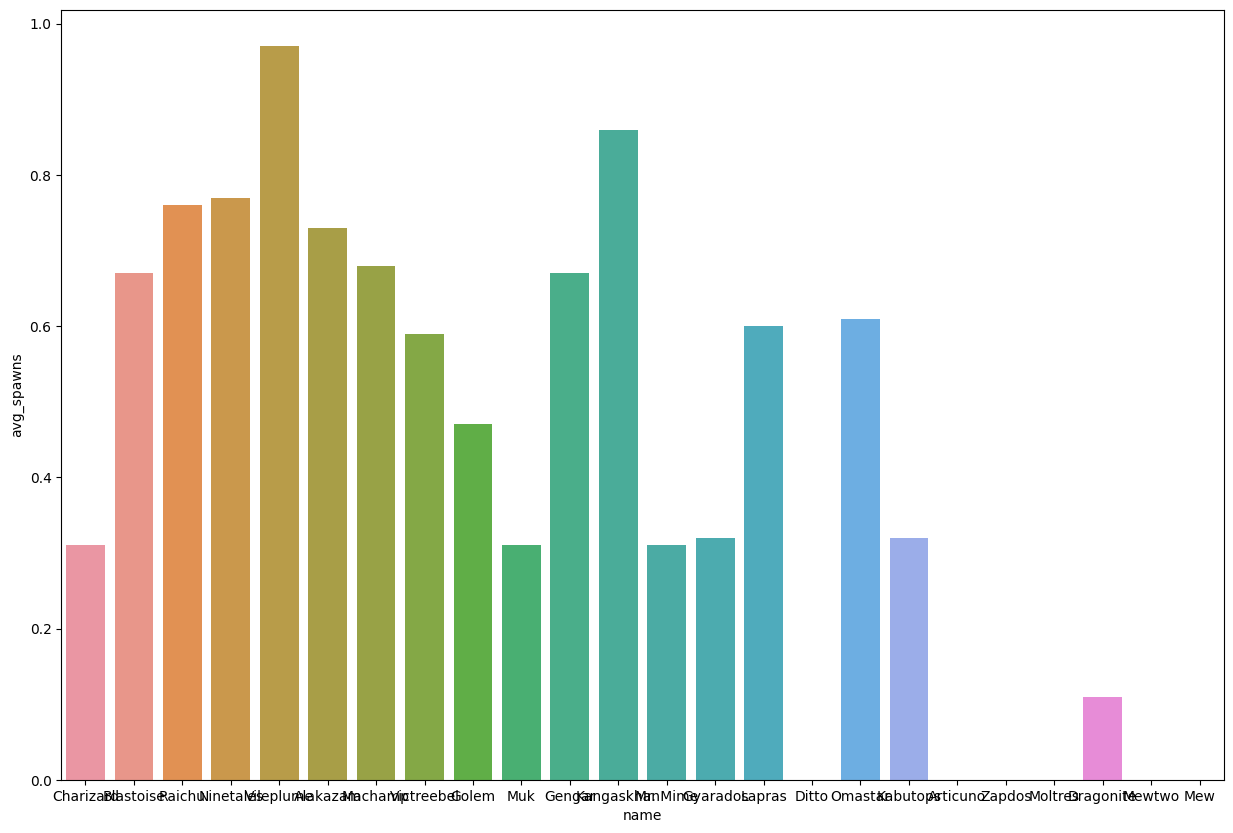

In [21]:
# Get all Pokemons whose spawn rate is less than 5
import matplotlib.pyplot as plt
import seaborn as sns
spawns_rate=df_1[df["avg_spawns"]< 0.5]

plt.figure(figsize=(15,10))
sns.barplot(x="name",y="avg_spawns",data=spawns_rate)


In [22]:
# Get all Pokemons that have less than 4 weaknesses
import ast
df_1["weaknesses"] = df_1["weaknesses"].apply(ast.literal_eval)
weknessless4 = df_1[df_1['weaknesses'].apply(lambda x: len(x) < 4)]
weknessless4.loc[:,["name","weaknesses"]]

,name,weaknesses
3,Charmander,"[Water, Ground, Rock]"
4,Charmeleon,"[Water, Ground, Rock]"
5,Charizard,"[Water, Electric, Rock]"
6,Squirtle,"[Electric, Grass]"
7,Wartortle,"[Electric, Grass]"
...,...,...
145,Moltres,"[Water, Electric, Rock]"
146,Dratini,"[Ice, Dragon, Fairy]"
147,Dragonair,"[Ice, Dragon, Fairy]"
149,Mewtwo,"[Bug, Ghost, Dark]"


In [23]:
# Get all Pokemons that have no multipliers at all
df_1["multipliers"] = df_1["multipliers"].str.extract(r'\[([\d.]+)\]').astype(float)
no_multipliers = df_1[df_1["multipliers"].isnull()]
no_multipliers.loc[:,["name","multipliers"]]

,name,multipliers
1,Ivysaur,NaN
2,Venusaur,NaN
5,Charizard,NaN
8,Blastoise,NaN
10,Metapod,NaN
...,...,...
145,Moltres,NaN
146,Dratini,NaN
148,Dragonite,NaN
149,Mewtwo,NaN


In [24]:
#Get all Pokemons that do not have more than 2 evolutions
evolution = df_1["next_evolution"].dropna().apply(ast.literal_eval).apply(lambda x: [evolution['name'] for evolution in x])
for i in evolution:
    if len(i)<=2:
        print(i)

['Ivysaur', 'Venusaur']
['Venusaur']
['Charmeleon', 'Charizard']
['Charizard']
['Wartortle', 'Blastoise']
['Blastoise']
['Metapod', 'Butterfree']
['Butterfree']
['Kakuna', 'Beedrill']
['Beedrill']
['Pidgeotto', 'Pidgeot']
['Pidgeot']
['Raticate']
['Fearow']
['Arbok']
['Raichu']
['Sandslash']
['Nidorina', 'Nidoqueen']
['Nidoqueen']
['Nidorino', 'Nidoking']
['Nidoking']
['Clefable']
['Ninetales']
['Wigglytuff']
['Golbat']
['Gloom', 'Vileplume']
['Vileplume']
['Parasect']
['Venomoth']
['Dugtrio']
['Persian']
['Golduck']
['Primeape']
['Arcanine']
['Poliwhirl', 'Poliwrath']
['Poliwrath']
['Kadabra', 'Alakazam']
['Alakazam']
['Machoke', 'Machamp']
['Machamp']
['Weepinbell', 'Victreebel']
['Victreebel']
['Tentacruel']
['Graveler', 'Golem']
['Golem']
['Rapidash']
['Slowbro']
['Magneton']
['Dodrio']
['Dewgong']
['Muk']
['Cloyster']
['Haunter', 'Gengar']
['Gengar']
['Hypno']
['Kingler']
['Electrode']
['Exeggutor']
['Marowak']
['Weezing']
['Rhydon']
['Seadra']
['Seaking']
['Starmie']
['Gyarados']

In [25]:
# Get all Pokemons whose spawn time is less than 300 seconds.
df_1["spawn_time"] = pd.to_datetime(df_1["spawn_time"],format='%H:%M')
threshold = pd.Timedelta(seconds=300)
spawn_time_1= df_1[df_1['spawn_time'].diff() < threshold]
spawn_time_1.loc[:,["name"]]

,name
1,Ivysaur
3,Charmander
5,Charizard
6,Squirtle
8,Blastoise
...,...
136,Porygon
138,Omastar
139,Kabuto
141,Aerodactyl


In [26]:
#Get all Pokemon who have more than two types of capabilities
filtered_pokemon = df_1[df_1['type'].apply(lambda x: len(x) > 2)]
print(filtered_pokemon)


     Unnamed: 0   id  num        name   
0             0    1    1   Bulbasaur  \
1             1    2    2     Ivysaur   
2             2    3    3    Venusaur   
3             3    4    4  Charmander   
4             4    5    5  Charmeleon   
..          ...  ...  ...         ...   
146         146  147  147     Dratini   
147         147  148  148   Dragonair   
148         148  149  149   Dragonite   
149         149  150  150      Mewtwo   
150         150  151  151         Mew   

                                                  img                  type   
0    http://www.serebii.net/pokemongo/pokemon/001.png   ['Grass', 'Poison']  \
1    http://www.serebii.net/pokemongo/pokemon/002.png   ['Grass', 'Poison']   
2    http://www.serebii.net/pokemongo/pokemon/003.png   ['Grass', 'Poison']   
3    http://www.serebii.net/pokemongo/pokemon/004.png              ['Fire']   
4    http://www.serebii.net/pokemongo/pokemon/005.png              ['Fire']   
..                               

no pokemon have two type of capabilty